In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind



In [230]:
data = "possum.csv"

df = pd.read_csv(data)






In [231]:
df.isnull().sum()
df_clean = df.dropna()
df_clean = df_clean.reset_index(drop=True)
df_clean.head(5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


#### Rename columns

In [232]:
df_clean = df_clean.rename(columns={
    'hdlngth': 'Head_len',
    'taill': 'tail',
    'skullw': 'Skull_width',
    'totlngth': 'total_len',
    'footlgth': 'foot_len'
})
df_clean.columns = df_clean.columns.str.lower()
df_clean.head(50)


,case,site,pop,sex,age,head_len,skull_width,total_len,tail,foot_len,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [233]:
df_clean.tail(50)

,case,site,pop,sex,age,head_len,skull_width,total_len,tail,foot_len,earconch,eye,chest,belly
51,55,4,other,m,2.0,103.1,63.2,92.5,38.0,72.5,44.9,16.4,30.5,36.0
52,56,4,other,m,3.0,99.9,61.5,93.7,38.0,68.7,46.8,16.4,27.5,31.5
53,57,4,other,f,4.0,95.1,59.4,93.0,41.0,67.2,45.3,14.5,31.0,39.0
54,58,4,other,m,3.0,94.5,64.2,91.0,39.0,66.5,46.4,14.4,30.5,33.0
55,59,4,other,m,2.0,102.5,62.8,96.0,40.0,73.2,44.5,14.7,32.0,36.0
56,60,4,other,f,2.0,91.3,57.7,88.0,39.0,63.1,47.0,14.4,26.0,30.0
57,61,5,other,m,7.0,95.7,59.0,86.0,38.0,63.1,44.9,15.0,26.5,31.0
58,62,5,other,f,3.0,91.3,58.0,90.5,39.0,65.5,41.3,16.0,27.0,32.0
59,63,5,other,f,6.0,92.0,56.4,88.5,38.0,64.1,46.3,15.2,25.5,28.5
60,64,5,other,f,3.0,96.9,56.5,89.5,38.5,63.0,45.1,17.1,25.5,33.0


#### Data Wrangling

In [234]:
#  dropping off the Pop col - irrelevant

df_clean.drop(columns="Pop", inplace= True)

KeyError: "['Pop'] not found in axis"

In [235]:

df_clean.isnull().sum()
# df.dropna()

case           0
site           0
pop            0
sex            0
age            0
head_len       0
skull_width    0
total_len      0
tail           0
foot_len       0
earconch       0
eye            0
chest          0
belly          0
dtype: int64

In [236]:
df_clean

,case,site,pop,sex,age,head_len,skull_width,total_len,tail,foot_len,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


### Comparing (Adult) Male and Female Possum 

- we'll be using adult possums to check for difference in male and female body structure for closer accuracy.
- By research, an adult Possum age range starts from 12months, i.e 1year

### Before moving on, lets take outliers into consideration

In [237]:
#  Function to remove outlier, to be called when needed.

def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

#### Headsize (length)

In [238]:
df = df_clean
mhl = df[(df['sex'] == 'm') & (df['age'] >= 1)][['sex','head_len']]

mhl

,sex,head_len
0,m,94.1
6,m,95.3
12,m,95.1
13,m,95.4
14,m,92.9
15,m,91.6
17,m,93.5
21,m,96.3
23,m,94.4
24,m,95.8


In [239]:
fhl = df_clean[(df_clean['sex'] == 'f') & (df_clean['age'] >= 1)][['sex','head_len']]
fhl

,sex,head_len
1,f,92.5
2,f,94.0
3,f,93.2
4,f,91.5
5,f,93.1
7,f,94.8
8,f,93.4
9,f,91.8
10,f,93.3
11,f,94.9


In [240]:
mhl = remove_outliers(df_clean[(df_clean['sex'] == 'm') & (df['age'] >= 1)]['head_len'])

mhl.describe()


count    56.000000
mean     92.923214
std       3.448741
min      85.300000
25%      90.700000
50%      93.250000
75%      95.325000
max      99.900000
Name: head_len, dtype: float64

In [241]:
fhl = remove_outliers(df_clean[(df_clean['sex'] == 'f') & (df_clean['age'] >= 1)]['head_len'])

fhl.describe()


count    40.000000
mean     92.582500
std       2.048125
min      88.200000
25%      91.300000
50%      92.650000
75%      94.075000
max      96.900000
Name: head_len, dtype: float64

In [242]:
# mhl = df[(df['sex'] == 'm') & (df['age'] >= 1)]['hdlngth']
mhl = remove_outliers(df_clean[(df_clean['sex'] == 'm') & (df_clean['age'] >= 1)]['head_len'])



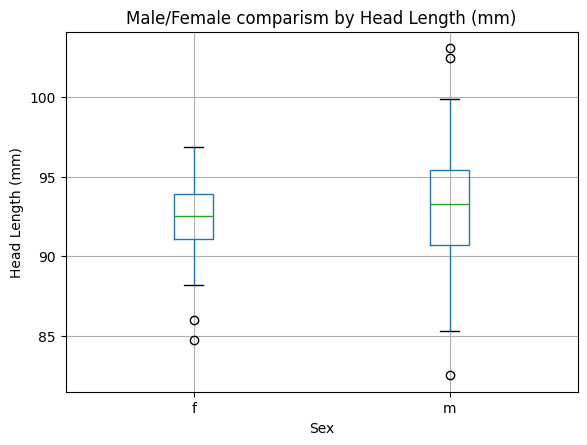

In [243]:
df_clean.boxplot(column='head_len', by='sex', showfliers=True)
plt.title("Male/Female comparism by Head Length (mm)")
plt.suptitle("")
plt.xlabel("Sex")
plt.ylabel("Head Length (mm)")
plt.grid(True)
plt.show()

- On average the Male head is barely longer than that of the female by a value of about 1mm
- This value is negligible and can't be used to make conclusion

#### Headsize (Skull Width)


In [244]:

m_skull = remove_outliers(df_clean[(df_clean['sex'] == 'm') & (df_clean['age'] >= 1)]['skull_width'])
m_skull.describe()



count    58.000000
mean     57.036207
std       3.088615
min      50.000000
25%      54.975000
50%      56.450000
75%      58.875000
max      64.200000
Name: skull_width, dtype: float64

In [245]:
f_skull = remove_outliers(df_clean[(df_clean['sex'] == 'f') & (df_clean['age'] >= 1)]['skull_width'])
f_skull.describe()

count    41.000000
mean     56.307317
std       1.938220
min      51.500000
25%      55.000000
50%      56.300000
75%      57.600000
max      60.000000
Name: skull_width, dtype: float64

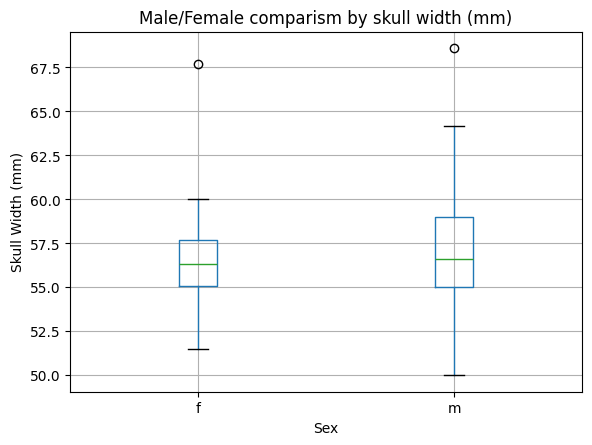

In [246]:
df_clean.boxplot(column='skull_width', by='sex', showfliers=True)
plt.title("Male/Female comparism by skull width (mm)")
plt.suptitle("")
plt.xlabel("Sex")
plt.ylabel("Skull Width (mm)")
plt.grid(True)
plt.show()

In [247]:
m_total_len = df_clean[(df_clean['sex'] == 'm') & (df_clean['age'] >= 1)][['sex','total_len']]
m_total_len

,sex,total_len
0,m,89.0
6,m,89.5
12,m,89.5
13,m,91.5
14,m,85.5
15,m,86.0
17,m,90.0
21,m,91.0
23,m,84.0
24,m,91.5


In [248]:
f_total_len = df_clean[(df_clean['sex'] == 'f') & (df_clean['age'] >= 1)][['sex','total_len']]
f_total_len

,sex,total_len
1,f,91.5
2,f,95.5
3,f,92.0
4,f,85.5
5,f,90.5
7,f,91.0
8,f,91.5
9,f,89.5
10,f,89.5
11,f,92.0


In [249]:
m_total_len = remove_outliers(df_clean[(df_clean['sex'] == 'm') & (df_clean['age'] >= 1)]['total_len'])
m_total_len.describe()

count    59.000000
mean     86.732203
std       4.173828
min      77.000000
25%      84.000000
50%      86.000000
75%      89.750000
max      96.000000
Name: total_len, dtype: float64

In [250]:
f_total_len = remove_outliers(df_clean[(df_clean['sex'] == 'f') & (df_clean['age'] >= 1)]['total_len'])
f_total_len.describe()

count    41.000000
mean     88.341463
std       3.661351
min      81.000000
25%      86.000000
50%      89.000000
75%      90.500000
max      96.500000
Name: total_len, dtype: float64